# Multivariate Regression

# Show the collections that have been generated

In [12]:
from pymongo import MongoClient
from process_collection import *
#  IMPORTANT:  Set these for each run:
#################################################
# mongoServer = None   # use the local mongodb server installed on your computer
#mongoServer = 'mongodb://server.mcgarity.info:27017/'  # Art's personal server
#mongoServer = 'mongodb://ubuntu:27017/'  # ubuntu Linux virtual machine on Art's Mac
mongoServer = 'mongodb://aws-2.greenphilly.net:27017/'  # aws-2 server for GreenPhilly
database = "jcohen4"
username = "jcohen4"
password = "wingohocking"
authenticationDatabase = "jcohen4"

client = MongoClient(mongoServer)
################################################

db = client[database]
db.authenticate(username, password, source=authenticationDatabase)  # pass credentials to database
collectionNames = sorted(db.collection_names())
collectionNames

[u'2008',
 u'2008trial1',
 u'2008trial3',
 u'2008trial4',
 u'2008trial6',
 u'first_wingo_test',
 u'fourth_wingo_test',
 u'impervFixed',
 u'impervNotFixed',
 u'july',
 u'july10',
 u'july12',
 u'july13',
 u'july14',
 u'july15',
 u'july16',
 u'july17',
 u'july2',
 u'july21',
 u'july22',
 u'july23',
 u'july24',
 u'july3',
 u'july4',
 u'july5',
 u'july6',
 u'july7',
 u'july8',
 u'july9',
 u'largeTrialLinier',
 u'multivariate_250_2010',
 u'multivariate_random_250_2010',
 u'multivariate_random_250_2011',
 u'multivariate_random_250_2012',
 u'multivariate_random_250_2013',
 u'randomTrial1',
 u'randomTrial2',
 u'randomTrial4',
 u'randomTrial5',
 u'random_multivariate',
 u'random_multivariate2',
 u'random_multivariate2009',
 u'random_multivariate2009year',
 u'random_multivariate2010',
 u'random_multivariate2012year',
 u'random_multivariate250',
 u'random_multivariate250_2009',
 u'random_multivariate3',
 u'random_multivariate5',
 u'random_multivariate6',
 u'random_multivariate7',
 u'random_multiva

In [13]:
from get_cso import calculate_cso
acft_to_mgal = 0.325851  # 1 acre-ft = 0.325851 MGal
collectionName = 'y16m12d27_AEM_45_Subcat_Leeds_Tree_Trench_and_Rain_Barrel_5'
runs = db[collectionName]
cursor = runs.find()
noLidRun = cursor[0]
noLidVolume = noLidRun['volume']  # 10^6 Gal / yr
noLidPeak = noLidRun['peak']   # cfs
noLidRunoff = noLidRun['runoff']  # acre-ft/yr
outflowSeries = noLidRun['outflow_series']
ratio = 0.05
csoResults = calculate_cso(outflowSeries,ratio)
csoVolumeMGal = csoResults['cso_volume']/1e6
print "noLidPeak = %0.2f cfs, noLidVolume = %0.2f MGal" % (noLidPeak,noLidVolume)
print "noLid Runoff = %0.2f acre-ft = %0.2f MGal" % (noLidRunoff,noLidRunoff*acft_to_mgal)
print "noLid csoVolumeMGal = %0.2f MGal" % csoVolumeMGal
# NOTE: Volume is total flow volume at sewer outlet while Runoff is total runoff volume
#       so they will likely be slightly different
noLidRunParamsList = noLidRun['runParamList']
#print noLidRunParamsList

noLidPeak = 1948.45 cfs, noLidVolume = 1948.90 MGal
noLid Runoff = 5987.73 acre-ft = 1951.11 MGal
noLid csoVolumeMGal = 687.45 MGal


In [31]:
# Compute Annual CSO Flows from results stored on Mongo
from get_cso import * 
from process_collection import * 
collectionName = 'y16m12d27_AEM_45_Subcat_Leeds_Tree_Trench_and_Rain_Barrel_5'
ratio = 0.05
numSubcatch = 45
numLID = 2
numVariables = numSubcatch*numLID
results = volume_reduction_and_runoff_volume_vs_lid_number(collectionName, numVariables, db)
volReduction = results["volReductionList"]
numberOfRuns = len(volReduction)
volReductionMgal = [x / 1e6 for x in volReduction]
numberOfRuns = len(volReductionMgal)
#print volReduction
# ALERT:  in cso_reduction, collectionName and numSubCatch is never used !!!
csoResults = cso_reduction(collectionName, ratio, numSubcatch, results) 
csoReduction = csoResults["csoReduction"]
csoReductionMgal = [x / 1e6 for x in csoReduction]
#print csoReductionMgal
cso = csoResults["cso"]
#print cso
totVol = csoResults["totalVol"]
print "Number of Runs stored in Database = %d" % numberOfRuns
#print results['numLists'][0]

[0.0, 542.4981579020524, 531.3361635684727, 496.9966584720964, 543.9278782714684, 538.1832787660444, 539.9532917305205, 498.9921687197645, 487.12568220219634, 516.9932800789325, 518.8268744712004, 514.4539883909044, 521.7644656985765, 544.8766917191763, 511.77017754478834, 537.1702039112763, 535.2499895857205, 508.9911292063445, 504.3007399351684, 546.0341308852685, 527.9006390078164, 572.9790701486525, 533.0412351466204, 533.2958503539124, 270.95902739841625, 264.9374070321964, 279.4071840786006, 249.26535931528866, 271.99168700259634, 247.5520135339684, 251.1719403931443, 261.9039791228405, 274.5276528514326, 241.2159128550003, 268.9026489075606, 271.24560836377225, 252.71411990803236, 280.0058216682242, 269.9854250035323, 277.82811737154066, 271.8554218502766, 258.3519694008485, 253.14466123663257, 266.6143436265726, 99.80001183445239, 108.02128434303582, 91.07506992985165, 94.79205878018463, 106.93234803884422, 110.24015094907236, 97.5167222421242, 91.09565781699645, 95.07332782828

[0.0, 2150.6920000000005, 2072.7399999999993]
{0: [0.0, 1077.1000000000006, 982.3000000000001], 1: [0.0, 1073.5920000000003, 1090.44]}


ValueError: x and y must have same first dimension

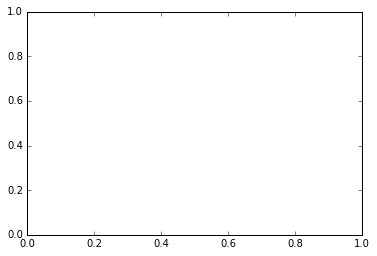

In [34]:
# Compute total greened acres:
gaPerLid = [0.1,0.936]
greenedAcres = []
lidGreenedAcres = {}
for lid in range(0,numLID):
    lidGreenedAcres[lid] = []
lidNumbers = results['numLists']
lidTransposed = zip(*lidNumbers)
for run in range(0,3):
    variable = 0
    lidList = lidTransposed[run]
    gaTotalThisRun = 0.0
    for lid in range(0,numLID):
        gaTotalThisLID = 0.0
        for subcat in range(0,numSubcatch):
            numberLID = lidList[variable]
            thisGreenedAcres = gaPerLid[lid]*numberLID
            gaTotalThisRun += thisGreenedAcres
            gaTotalThisLID += thisGreenedAcres
            variable += 1
        lidGreenedAcres[lid].append(gaTotalThisLID)
    greenedAcres.append(gaTotalThisRun)
print greenedAcres
print lidGreenedAcres
(fig, ax1) = plt.subplots()
ax1.plot(greenedAcres,csoReductionMgal,'ko',color = 'b',markersize = 1)
#ax1.plot(xline,yline)
ax1.set_xlabel("Greened Acres",fontsize=12)
ax1.set_ylabel("CSO Reduction (MGal)",fontsize=12)

In [16]:
# Multivariable Regression for Annual CSO Volumes
import numpy as np
import statsmodels.api as sm
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
### regression
y = csoResults["csoReduction"]
# list of variable values (LID numbers) for each random LID placement:
X = results['numLists']   # a list of lists (so upper case)
stats = reg_m(y,X)
print "Exact r-squared:"
print stats.rsquared
print stats.summary()
print stats.params
#print X

Exact r-squared:
0.980866416933
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 30 Dec 2016   Prob (F-statistic):          2.21e-143
Time:                        12:21:56   Log-Likelihood:                -5417.1
No. Observations:                 301   AIC:                         1.102e+04
Df Residuals:                     210   BIC:                         1.135e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          5.967e+0

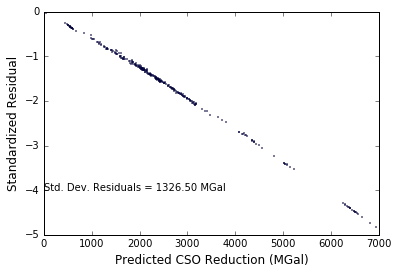

In [17]:
# Generate Residuals Plot for Annual CSO Volumes
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# First, transpose results['numLists']:
xVals = zip(*results['numLists'])
#print list(xvals[0])

betaZero = stats.params[numVariables]
yPredicted = []
for xTuple in xVals:
    i = 0
    yval = betaZero
    for beta in stats.params:
        yval += beta*xTuple[i]
        i += 1
        if i == numVariables:
            break
    yPredicted.append(yval/1e6)  # convert to 10^6 Gal
residuals = []
i = 0
for ySWMM in csoReductionMgal:
    #print ySWMM
    resid = ySWMM - yPredicted[i]  # Residual in 10^6 Gal
    residuals.append(resid)
    i+=1
stdDevResiduals = np.std(residuals, ddof=1) #ddof=1 for SAMPLE std. dev.
standardizedResiduals = [x / stdDevResiduals for x in residuals]
(fig, ax1) = plt.subplots()
ax1.plot(yPredicted,standardizedResiduals,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("Predicted CSO Reduction (MGal)",fontsize=12)
#ax1.set_ylabel("Residual (MGal)",fontsize=12)
ax1.set_ylabel("Standardized Residual",fontsize=12)
stdDevText = "Std. Dev. Residuals = %0.2f MGal" % stdDevResiduals
ax1.text(2,-4,stdDevText)

In [18]:
# Multivariable Regression for Sewer Outflow Volume
import numpy as np
import statsmodels.api as sm
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
### regression
y = volReduction
# list of variable values (LID numbers) for each random LID placement:
X = results['numLists']   # a list of lists (so upper case)
stats = reg_m(y,X)
print "Exact r-squared:"
print stats.rsquared
print stats.summary()
print stats.params
#print X

Exact r-squared:
0.997828985148
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1072.
Date:                Fri, 30 Dec 2016   Prob (F-statistic):          2.70e-242
Time:                        12:21:57   Log-Likelihood:                -5297.9
No. Observations:                 301   AIC:                         1.078e+04
Df Residuals:                     210   BIC:                         1.112e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          6.776e+0

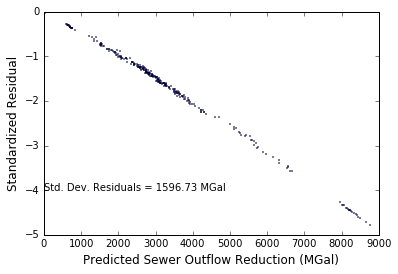

In [19]:
# Generate Residuals Plot for Sewer Outflow Volume
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# First, transpose results['numLists']:
xVals = zip(*results['numLists'])
#print list(xvals[0])

betaZero = stats.params[numVariables]
yPredicted = []
for xTuple in xVals:
    i = 0
    yval = betaZero
    for beta in stats.params:
        yval += beta*xTuple[i]
        i += 1
        if i == numVariables:
            break
    yPredicted.append(yval/1e6)  # convert to 10^6 Gal
residuals = []
i = 0
for ySWMM in volReductionMgal:
    #print ySWMM
    resid = ySWMM - yPredicted[i]  # Residual in 10^6 Gal
    residuals.append(resid)
    i+=1
stdDevResiduals = np.std(residuals, ddof=1) #ddof=1 for SAMPLE std. dev.
standardizedResiduals = [x / stdDevResiduals for x in residuals]
(fig, ax1) = plt.subplots()
ax1.plot(yPredicted,standardizedResiduals,'ko',color = 'b',markersize = 1)
ax1.set_xlabel("Predicted Sewer Outflow Reduction (MGal)",fontsize=12)
ax1.set_ylabel("Standardized Residual",fontsize=12)
#ax1.set_ylabel("Residual (MGal)",fontsize=12)
stdDevText = "Std. Dev. Residuals = %0.2f MGal" % stdDevResiduals
ax1.text(2,-4,stdDevText)

Total number of SWMM runs = 301
[  0.49107134  55.18604775]


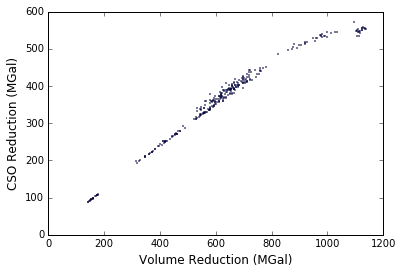

In [20]:
# SCATTER PLOT OF CSO ANNUAL VOLUME REDUCTION VS SEWER OUTFLOW ANNUAL VOLUME REDUCTION
%matplotlib inline
import matplotlib.pyplot as plt
print "Total number of SWMM runs = %d" % len(volReductionMgal)
#xRange = [50,70]
#yRange = [25,45]
# fit a straight line to CSO volume vs Outflow volume:
VolumeRed = []
VolumeRed.append(volReductionMgal)
stats = reg_m(csoReductionMgal,VolumeRed)
print stats.params
a = stats.params[1]  # intercept
b = stats.params[0]  # slope
#xline = []
#yline = []
#for xval in range(xRange[0],xRange[1]+1, 1):
#    xline.append(xval)
#    yval = a + b*xval
#    yline.append(yval)
(fig, ax1) = plt.subplots()
ax1.plot(volReductionMgal,csoReductionMgal,'ko',color = 'b',markersize = 1)
#ax1.plot(xline,yline)
ax1.set_xlabel("Volume Reduction (MGal)",fontsize=12)
ax1.set_ylabel("CSO Reduction (MGal)",fontsize=12)
#plt.xlim(xRange)
#plt.ylim(yRange)

In [21]:
### regression for total volume outflow
y = csoResults["totalVol"]
#print y
x = results['numLists']
#print x
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    statistics = sm.OLS(y, X).fit()
    return statistics
reg_m(y,x)

print "Exact r-squared:"
print reg_m(y, x).rsquared
print reg_m(y, x).summary()


Exact r-squared:
0.997860561363
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1088.
Date:                Fri, 30 Dec 2016   Prob (F-statistic):          5.80e-243
Time:                        12:21:58   Log-Likelihood:                -5295.9
No. Observations:                 301   AIC:                         1.077e+04
Df Residuals:                     210   BIC:                         1.111e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -6.796e+0